<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-количества-событий-на-пользователя-в-выборках" data-toc-modified-id="Распределение-количества-событий-на-пользователя-в-выборках-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Распределение количества событий на пользователя в выборках</a></span></li><li><span><a href="#Распределение-числа-событий-в-выборках--по-дням" data-toc-modified-id="Распределение-числа-событий-в-выборках--по-дням-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределение числа событий в выборках  по дням</a></span></li><li><span><a href="#Конверсия-в-воронке-в-выборках-на-разных-этапах" data-toc-modified-id="Конверсия-в-воронке-в-выборках-на-разных-этапах-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Конверсия в воронке в выборках на разных этапах</a></span></li><li><span><a href="#Какие-особенности-данных-нужно-учесть,-прежде-чем-приступать-к-A/B-тестированию" data-toc-modified-id="Какие-особенности-данных-нужно-учесть,-прежде-чем-приступать-к-A/B-тестированию-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию</a></span></li></ul></li><li><span><a href="#Результаты-A/B-тестирования" data-toc-modified-id="Результаты-A/B-тестирования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Результаты A/B-тестирования</a></span><ul class="toc-item"><li><span><a href="#Проверка-статистической-разницы-долей-z-критерием" data-toc-modified-id="Проверка-статистической-разницы-долей-z-критерием-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка статистической разницы долей z-критерием</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# A/B-тестирование

**Цель исследования** — провести оценку результатов A/B-теста. 
- Оценить корректность проведения теста:
 - проверить пересечение тестовой аудитории с конкурирующим тестом
 - проверить совпадение теста и маркетинговых событий, другие проблемы временных границ теста
- Проанализировать результаты теста

**Ход исследования**:
1. Обзор данных 
2. Предобработка данных
3. Исследовательский анализ 
4. Проверка гипотез
5. Выводы

## Обзор данных

In [72]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import math as mth


import matplotlib.pyplot as plt
from plotly import graph_objects as go
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [73]:
# прочтиаем файлы

new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
ab_events = pd.read_csv('/datasets/final_ab_events.csv')
participants = pd.read_csv('/datasets/final_ab_participants.csv')
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')

In [74]:
# создадим функцию для получения информации о таблицах 

def df_info(df):
    print('Первые 5 строк датасета')
    display(df.head(5))
    print('Общая информация о датасете')
    display(df.info())
    print('Количество дубликатов: {}'. format(df.duplicated().sum()))
    print('Количество пропусков')
    print(df.isna().sum())
    print('Статистические данные')
    display(df.describe())

In [75]:
# вызовем функцию для new_users

df_info(new_users)

Первые 5 строк датасета


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


None

Количество дубликатов: 0
Количество пропусков
user_id       0
first_date    0
region        0
device        0
dtype: int64
Статистические данные


,user_id,first_date,region,device
count,61733,61733,61733,61733
unique,61733,17,4,4
top,DFFB4F3905881D6B,2020-12-21,EU,Android
freq,1,6290,46270,27520


In [76]:
# выведем минимальную и максимальную даты тестирования

print('Минимальная первая дата:', new_users['first_date'].min())
print('максимальная первая дата', new_users['first_date'].max())

Минимальная первая дата: 2020-12-07
максимальная первая дата 2020-12-23


In [77]:
# выведем регионы тестирования

new_users['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

- Таблица new_users сожержит данные о 61 733 уникальных пользователях. 
- Пропусков и дубликатов в таблице нет.
- Необходимо привести тип данных в столбце first_date к формату datetime. 
- Дата окончания тестирования в таблице отличается от той, что указана в задании: мы располагаем данными до 23 декабря вместо заявленного 21 декабря. Необходимо отфильтровать данные по дате.
- Также нужно отфильтровать данные по региону: мы должны проанализировать новых пользователей из региона EU, в таблице данные о пользователях из 4 регионов. 



In [78]:
# вызовем функцию для new_users ab_events

df_info(ab_events)

Первые 5 строк датасета


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


None

Количество дубликатов: 0
Количество пропусков
user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64
Статистические данные


,details
count,62740.000000
mean,23.877631
std,72.180465
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


In [79]:
# выведем минимальную и максимальную даты покупки

print('Минимальная первая дата:', ab_events['event_dt'].min())
print('максимальная первая дата', ab_events['event_dt'].max())

Минимальная первая дата: 2020-12-07 00:00:33
максимальная первая дата 2020-12-30 23:36:33


- Таблица содержит данные о 44 0317 совершивших покупки новых пользователей.
- Дубликатов в таблице нет. 
- 377577 пропусков есть в столбце с дополнительные данными о событии. Поскольку не все события являются покупками, оставим пустые значения незаполненными.  
- Необходимо привести тип данных в столбце event_dt к формату datetime.
- В таблице отсутствуют данные за 5 дней: в задании оккончанием исследования указано 4 января, на деле исследование завершилось 30 декабря. Вероятно, тест был остановлен слишком рано, мы располагаем неполными данными.

In [80]:
# вызовем функцию для participants

df_info(participants)

Первые 5 строк датасета


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


None

Количество дубликатов: 0
Количество пропусков
user_id    0
group      0
ab_test    0
dtype: int64
Статистические данные


,user_id,group,ab_test
count,18268,18268,18268
unique,16666,2,2
top,7FE6DDDB6C85C934,A,interface_eu_test
freq,2,9655,11567


In [81]:
# проверим, какие тесты проводились

participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

- В таблице participants данные о 18268 участников теста. 
- Пропусков и дубликатов нет.
- Необходимо проверить, нет ли в таблице пользователей, которые попали в обе группы теста одновременно.
- Также нужно проверить, отсутствует ли в таблице пересечение участников в двух тестах. 

In [82]:
# вызовем функцию для  marketing_events

df_info(marketing_events)

Первые 5 строк датасета


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

Количество дубликатов: 0
Количество пропусков
name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64
Статистические данные


,name,regions,start_dt,finish_dt
count,14,14,14,14
unique,14,6,14,14
top,CIS New Year Gift Lottery,APAC,2020-10-01,2020-07-01
freq,1,4,1,1


В таблице marketing_events нет пропусков и дубликатов. Необходимо привести столбцы с датами к формату datetime. 

## Предобработка данных

In [83]:
# приведем столбцы с датами к формату datetime

new_users['first_date'] = pd.to_datetime(new_users['first_date'])
ab_events['event_dt'] = pd.to_datetime(ab_events['event_dt'])
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])


In [84]:
# объеденим таблицы eu_users, participants и ab_events

users_participants = pd.merge(participants,new_users,on='user_id')
users_participants_events =  pd.merge(users_participants,ab_events,on='user_id')
users_participants_events.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN


In [87]:
users_participants_events['date_diff'] = (pd.to_datetime(users_participants_events.event_dt) - pd.to_datetime(users_participants_events.first_date)).dt.days
users_participants_events

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,date_diff
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99,0
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99,18
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN,0
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN,18
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN,0
...,...,...,...,...,...,...,...,...,...,...
106620,63FBE257B05F2245,A,interface_eu_test,2020-12-20,EU,Android,2020-12-23 13:03:17,login,NaN,3
106621,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-14 19:12:49,login,NaN,0
106622,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-15 01:50:22,login,NaN,1
106623,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-16 19:27:36,login,NaN,2


In [88]:
# удалим события старше 14 дней 

users_participants_events = users_participants_events[users_participants_events['date_diff']<=14]
users_participants_events

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,date_diff
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99,0
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN,0
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN,0
6,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,login,NaN,0
8,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20 15:46:06,product_page,NaN,0
...,...,...,...,...,...,...,...,...,...,...
106620,63FBE257B05F2245,A,interface_eu_test,2020-12-20,EU,Android,2020-12-23 13:03:17,login,NaN,3
106621,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-14 19:12:49,login,NaN,0
106622,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-15 01:50:22,login,NaN,1
106623,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-16 19:27:36,login,NaN,2


In [89]:
# отфильтруем данные таблицы до 21 декабря

users_participants_events = users_participants_events[users_participants_events['first_date'] <= '2020-12-21']

In [90]:
# отфильтруем данные таблицы по региону

users_participants_events = users_participants_events[users_participants_events['region'] == 'EU']

In [91]:
# проверим принадлежность пользователей к участию в обоих тестах

len(np.intersect1d(users_participants_events.query('ab_test == "recommender_system_test"')['user_id'].unique(), users_participants_events.query('ab_test == "interface_eu_test"')['user_id'].unique()))

887

887 человек попали сразу в два теста. Чтобы дальнейшее исследование было корректным, удалим этих пользователей.

In [92]:
# посмотрим на id тех, кто попал в обе группы

list_id = np.intersect1d(users_participants_events.query('ab_test == "recommender_system_test"')['user_id'].unique(), users_participants_events.query('ab_test == "interface_eu_test"')['user_id'].unique())

In [93]:
# переведем массив в список

list_id = list_id.tolist()

In [94]:
# удалим пользователей из обеих групп 

users_participants_events = users_participants_events[~users_participants_events.user_id.isin(list_id)]

In [95]:
# проверим результат вычислений 

len(np.intersect1d(users_participants_events.query('ab_test == "recommender_system_test"')['user_id'].unique(), users_participants_events.query('ab_test == "interface_eu_test"')['user_id'].unique()))

0

Мы удалили пользователей, которые были сразу в обоих тестах. Теперь оставим только пользователей recommender_system_test.

In [96]:
# отфильтруем данные по тесту recommender_system_test

users_participants_events = users_participants_events[users_participants_events['ab_test'] == 'recommender_system_test']

In [97]:
# проверим количество пользователей, участвующих в двух группах теста одновременно

len(np.intersect1d(users_participants_events.query('group == "A"')['user_id'].unique(), users_participants_events.query('group == "B"')['user_id'].unique()))

0

Между группами А и В нет пересечения пользователей. Проверим количество участников в каждом тесте. 

In [98]:
# посчитаем количество пользователей в каждой группе 

users_participants_events.groupby('group')['user_id'].nunique()

group
A    1939
B     655
Name: user_id, dtype: int64

Пользователи распределены между группами неравномерно. В группе А почти в 3 раза больше пользователей, чем в группе B.


In [99]:
# посмотрим дату начала и окончания маркетинговых мероприятий

print('Дата начала:', marketing_events['start_dt'].min())
print('Дата окончания:', marketing_events['finish_dt'].max())

Дата начала: 2020-01-25 00:00:00
Дата окончания: 2021-01-07


Маркетинговые мероприятия проводились с 25.01.2020 по 07.01.2021. Мы получили данные, что тест проводился с 07.12.2020 по 30.12.2020. Проверим, какие маркетинговые мероприятия проходили в период проведения AB-теста.





In [100]:
# проверим, какие маркетинговые мероприятия проходили в период проведения AB-теста

marketing_events[(marketing_events['start_dt'] >= '2020-12-07 00:00:33') & (marketing_events['start_dt'] <= '2020-12-30 23:36:33')]

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


В период тестирования проходило 2 маркетинговых события, но в европейском регионе одно - Christmas&New Year Promo. Оно проходило с 25 декабаря по 3 января 2020 года. Мы отфильтруем данные с 25 по 30 декабаря, чтобы выводы были корректными.

In [101]:
# отфильтруем данные до начала маркетингового события 

users_participants_events = users_participants_events[users_participants_events['event_dt']< '2020-12-25']

In [102]:
# посчитаем итоговое количество пользователей 

users_participants_events['user_id'].nunique()

2594

In [103]:
# посчитаем количество участников из EU в тесте 

users_participants_events.groupby('region')['user_id'].nunique()

region
EU    2594
Name: user_id, dtype: int64

In [104]:
# посчитаем общее количество участников из EU

new_users.query('region == "EU"')['user_id'].nunique()

46270

In [105]:
# посчитаем долю участников из EU в тесте 

2594/46270

0.0560622433542252

Доля участников теста из европейского региона составляет 5.6% от общего количества европейских пользователей. Ожидаемым количеством были 15%.  

Ожидаемым количеством участников теста должны были стать 6000 пользователей. В результате фильтрации по интересующему нас европейскому региону, отсечения пользователей из конкурирующего теста и пользователй, попавших в два тестирования одновременно, а также пересекающейся с маркетинговым мероприятием дате, мы получили 2594 участников. Обнаружили также, что количество пользователей в двух группах теста распределено неравномерно: 1939 в группе А и 655 в группе В. Такие данные могут привести к некорректным результатам теста. 

##  Исследовательский анализ данных

### Распределение количества событий на пользователя в выборках

In [106]:
# посмотрим, какие события может совершить пользователей 

users_participants_events['event_name'].value_counts()

login           6806
product_page    4222
product_cart    2047
purchase        2007
Name: event_name, dtype: int64

In [107]:
# посчитаем среднее количество совершаемых пользователем событий 

users_participants_events.groupby('user_id')['event_name'].count().mean().round()

6.0

В среднем 1 пользователь совершает 6 событий

In [108]:
# посчитаем среднее количество совершаемых пользователем из группы А событий 

group_A = users_participants_events[users_participants_events['group'] == 'A']
group_A.groupby('user_id')['event_name'].count().mean().round()

6.0

In [109]:
# посчитаем среднее количество совершаемых пользователем из группы B событий 

group_B = users_participants_events[users_participants_events['group'] == 'B']
group_B.groupby('user_id')['event_name'].count().mean().round()

5.0

В среднем пользователь из группы А совершает 6 событий, из группы В - 5. Всего пользователь может совершить такие события: регистрация, просмотр страницы с товаром, просмотр корзины, покупка. 

### Распределение числа событий в выборках  по дням

In [110]:
# выделим дату из столбца event_dt

users_participants_events['event_dt'] = users_participants_events['event_dt'].dt.date
users_participants_events['event_dt'] = pd.to_datetime(users_participants_events['event_dt'])

In [111]:
# создадим таблицу с пользователями и днями событий

event_date = users_participants_events.groupby(['event_dt', 'group'])['user_id'].count().reset_index()

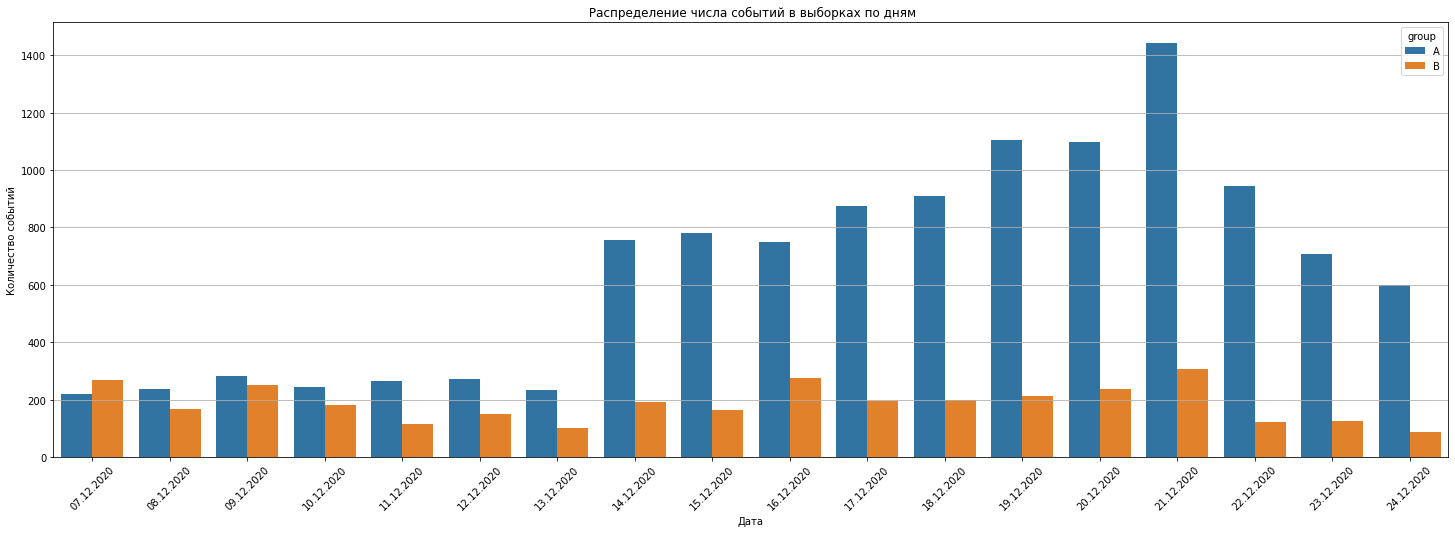

In [112]:
# построим график распределения числа событий 

event_date.index = event_date['event_dt']
plt.figure(figsize = (25, 8))
plt.grid(True)
plt.title(' Распределение числа событий в выборках по дням')
sns.barplot(data = event_date, x = event_date.index.strftime('%d.%m.%Y'), y = 'user_id', hue = 'group')
plt.ylabel('Количество событий')
plt.xlabel('Дата')
plt.xticks(rotation = 45)
plt.show()

На 8 день проведения теста происходит резкое увеличение числа событий. Вероятно, это можно объяснить сезонностью: пользователи совершают больше покупок в преддверии Рождества, потому что после 24 декабря количество событий уменьшается.  

### Конверсия в воронке в выборках на разных этапах

In [113]:
# отфильтруем пользователей в группе А

group_a = users_participants_events.query('group == "A"').groupby('event_name')['user_id'].nunique().reset_index()
# построим воронку для пользователей в группе А

fig = go.Figure(
    go.Funnel(
        y=[
            'Login',
            'Product_page',
            'Product_cart',
            'Purchase',
        ],
        x=[1939, 1256, 589, 613],
    )
)
fig.show() 



В группе А на второй шаг (просмотр товара) переходит 65.2% пользователей. Далее мы видим, что число пользователей, которые оплатили покупку, больше тех, кто перешел в корзину. Вероятно, пользователи могут оплатить товар, не переходя в корзину, либо произошел технический сбой. В любом случае, до оплаты товара доходит только половина тех пользователей, что перешли на его страницу. 

In [114]:
# отфильтруем пользователей в группе B

group_b = users_participants_events.query('group == "B"').groupby('event_name')['user_id'].nunique().reset_index().sort_values('user_id', ascending = False)

# построим воронку для пользователей в группе B
fig = go.Figure(
    go.Funnel(
        y=[
            'Login',
            'Product_page',
            'Product_cart',
            'Purchase',
        ],
        x=[654, 367, 184, 191],
    )
)
fig.show() 


В группе В на страницу товара переходит 56% пользователей. И также как и в группе А, только половина из них переходит к покупке. 

### Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию

- количество пользователей в группах должно различаться не более, чем на 1% 
- проводить тест не менее 2 недель
- тест не должен пересекаться с конкурирующим тестированием и маркетинговыми событиями 
- пользователи в группах не должны пересекаться 
- тест нельзя останавливать раньше указанного срока

## Результаты A/B-тестирования

- мы получили данные по пользователям с 7 по 23 декабря 2020 года вместо указанного 21 декабря 2020 года
- кроме пользователей из европейского региона в данные попали пользователи из других регионов
- тестирование было остановлено раньше на 5 дней, либо произошла не полная выгрузка данных: не хватает данных с 31 декабря 2020 по 4 января 2021 года
- тест проводился параллельно с конкурирующим тестом, поэтому будет сложнее интерпретировать результаты теста и решать однозначно, что могло повлиять на конверсию 
- контрольные группы А и В сильно отличаются размером: в группе В практически в 3 раза меньше участников 
- проведение теста совпало с маркетинговым событием Christmas&New Year Promo. Чтобы результат тестирования был чище, мы удалили период промо из анализа
- Вывод: данные неполлные, тест был провееден некорректно, его результаты не могут быть точными.


### Проверка статистической разницы долей z-критерием

In [115]:
# создадим таблицу с количеством пользователей в двух группах на каждом шаге 

all_funnels = users_participants_events.pivot_table(index='event_name', columns='group',values='user_id',aggfunc='nunique')\
                       .sort_values('A',ascending=False)
all_funnels.reset_index()

group,event_name,A,B
0,login,1939,654
1,product_page,1265,367
2,purchase,613,191
3,product_cart,589,184


In [116]:
users = users_participants_events.groupby('group')['user_id'].nunique().reset_index()
users = users.set_index(users.columns[0])
users

,user_id
group,
A,1939
B,655


Для проверки гипотез воспользуемся Z-критерием и применим метод Бонферрони (поправка Бонферрони), так как проводим множественное сравнение. В нашем случае мы будем проводить 8 сравнений, следовательно, bonferroni_alpha будет равно alpha / 8.

Сформулируем гипотезы

- H0: Конверсия в группах A и B одинаковая
- H1: Конверсия в группах A и B различается

In [117]:
# проверим статистическую разницу долей z-критерием

def print_z_test_with_bonferroni_validation_result(group1, group2, event, alpha): 
    p1_event = all_funnels.loc[event, group1]
    p2_event = all_funnels.loc[event, group2] 
    p1_users = users.loc[group1, 'user_id'] 
    p2_users = users.loc[group2, 'user_id'] 
    p1 = p1_event / p1_users 
    p2 = p2_event / p2_users 
    difference = p1 - p2
    p_combined = (p1_event + p2_event) / (p1_users + p2_users) 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_users + 1 / p2_users))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    bonferroni_alpha = alpha / 8
    
    print('Проверка для групп {} и {}, событие: {}, p-значение: {p_value:.2f}'.format(group1, group2, event, p_value=p_value))
    if (p_value < bonferroni_alpha):
        print("Отвергаем нулевую гипотезу о равенстве конверсии в группах")
    else:
        print("Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах")

In [118]:
for event in all_funnels.index:
    print_z_test_with_bonferroni_validation_result('A', 'B', event, 0.05)
    print()

Проверка для групп A и B, событие: login, p-значение: 0.09
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A и B, событие: product_page, p-значение: 0.00
Отвергаем нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A и B, событие: purchase, p-значение: 0.24
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах

Проверка для групп A и B, событие: product_cart, p-значение: 0.27
Не получилось отвергнуть нулевую гипотезу о равенстве конверсии в группах



Статистически значимой разницы в конверсии двух групп нет в таких событиях, как регистрация, добавление в корзину и покупка. В данных случаях мы не можем опровергуть нулевую гипотезу о равенстве конверсий. 

В событии "просмотр карточки товара" между двумя группами присутствует статистически значимая разница, мы не можем принять нулевую гипотезу: конверсия группы А отличается от конверсии группы В. 



## Вывод

В ходе исследовательского анализа мы обнаружили такие недочеты по пунктам ТЗ:
- отсутствуют события в диапазоне с 31 декабря 2020 по 4 января 2021
- кроме пользователей из европейского региона присутствовали данные пользователей других регионов 
- ожидаемым количеством участников теста были 6000 пользователей, по факту мы получили только 2594
- одновременно с тестом recommender_system_test проходил тест interface_eu_test. Произошло пересечение пользователей в двух тестах 
- время проведения теста совпало с маркетинговым событием, которое могло повлиять на поведение  пользователей
- участники в группах А и В распределены неравномерно: группа А практически в 3 раза больше. Такие данные могут исказить результат теста 

Мы видим нарушение ключевых критериев А/В-теста и неудовлетворительное качество данных. Проведение теста можно назвать неудовлетворительным, его результаты нельзя считать достоверными.